<center>

<font size="5">MGMTMSA 403: Optimization</font>

</center>


<center>

<font size="5">Assignment 4: Logistic Regression and Gradient Descent</font>

</center>


<div style="display: flex; justify-content: space-between;">
    <div style="text-align: left;">
        Due on BruinLearn by 11:59pm on February 14th.
    </div>
    <div style="text-align: right;">
        Arnav Garg (906310841) <br>
        Oscar Trumpy (706310371) <br>
        Facundo Klappenbach (306316186) <br>
    </div>
</div>


**<font size="5">Background</font>**

The file LRTrain.csv contains information from 300 images of malignant (i.e. cancerous) and benign (i.e., non-cancerous) breast tissue. The data set describes attributes of the cell nuclei in each image. Each row of the dataset corresponds to one image. For each image, ten different attributes related to the cell nuclei are recorded:
<br>
<br>
• radius (mean of distances from center to points on the perimeter)
<br>
• texture (standard deviation of gray-scale values)
<br>
• perimeter
<br>
• area
<br>
• smoothness (local variation in radius lengths)
<br>
• compactness (perimeter2 / area - 1.0)
<br>
• concavity (severity of concave portions of the contour)
<br>
• concave points (number of concave portions of the contour)
<br>
• symmetry
<br>
• fractal dimension (a measure of how “complex” the perimeter is)
<br>
<br>
Because each image contains multiple cell nuclei, three quantities are measured for each of the 10 attributes above: the mean, standard error, and worst case value. This results in a total of 30 features for each image. The goal of this assignment is to train a logistic regression classifier using gradient descent, which will then be used to predict whether or not each image was taken from cancerous tissue.

![Screenshot 2024-02-09 at 10.08.31 PM.png](<attachment:Screenshot 2024-02-09 at 10.08.31 PM.png>)
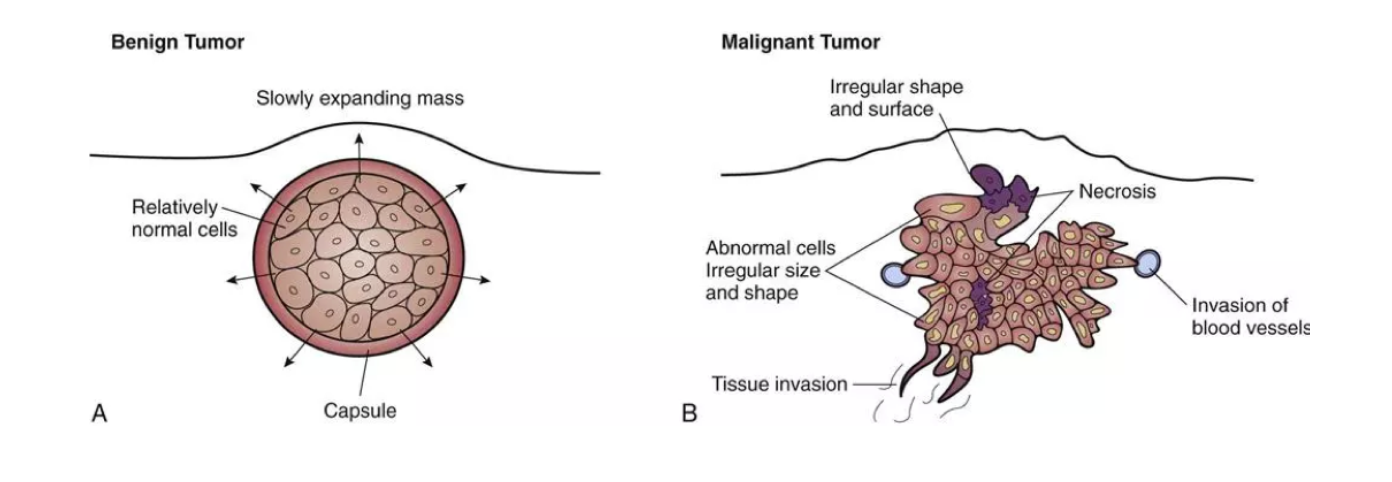

**<font size="5">Questions</font>**

**Question 1.** Train a logistic regression classifier using gradient descent on the training data set LRTrain.csv. The first 30 columns are feature data, and the 31st column is the label of the observation (1 = cancerous, 0 = not cancerous). As a starting point, try using a step size of γ = 0.00001 and a maximum of T = 2000 iterations. You can also use a termination criterion related to the norm of the gradient (np.linalg.norm() may be useful). Experiment with different step sizes and termination criteria to try to obtain a good model fit.



The solution can be given by implementing the following gradient descent algrithm:

1. Start at any initial point x^k. Pick a step size 𝛾 and a tolerance ε.
2. Compute the gradient at x^k .
3. Update solution:
\begin{align}
x^{k+1} = x^k - \gamma \nabla f(x^k)
\end{align}

4. Check:
\begin{align}
\text{if} \quad \nabla f(x^k) \le \epsilon \quad \text{terminate} \\
\text{else} \quad k \leftarrow k+1 \quad \text{return to Step 2}
\end{align}

Where the negative log likelihood function is given by:
\begin{align}
 -\log p(y_i|x_i, w) = y_i \log(1 + e^{-w^Tx_i}) + (1 - y_i) \log(1 + e^{w^Tx_i})
\end{align}

Where gradient at a point w for the negative log likelihood function is given by:
\begin{align}
\frac{1}{n} \sum_{i=0}^n (\frac{1}{1 + e^{-w^Tx_i}} - y_i) x_i
\end{align}

In [3]:
import numpy as np
from numpy import genfromtxt
import pandas as pd

### Question 1 ###
# Load data
data = genfromtxt('LRTrain.csv', delimiter = ',', skip_header = 1)

n = data.shape[0]
d = data.shape[1] - 1
T = 10000 # number of iterations
eps = 0.4 # tolerance 
step = 0.000035 # step size

# get feature data
x = data[:, 0:d]

# get label data
y = data[:, d]
w = np.zeros(d)

## Define gradient function
def grad(w, x, y):
    
    # initialize d-dimensional gradient vector 
    g = np.zeros(d)
    
    # construct gradient vector by looping through each of the n observations to sum them 
    for i in range(n):
        g = g + (1 / (1 + np.exp(-np.dot(w,x[i]))) - y[i]) * x[i] 
    return (1 / n ) * g

## Define negative log likelihood function
def fval(w, x, y):
    v = 0;
    for i in range(n):
        v = v + y[i] * np.log(1 + np.exp(-np.dot(w, x[i]))) + (1 - y[i]) * np.log(1 + np.exp(np.dot(w, x[i])))
    return (1 / n) * v

## Define norm of the gradient 
def gradnorm(w, x, y):
    return np.linalg.norm(grad(w, x, y))

## Perform gradient descent
for t in range(T):
    
        # update weights
        w = w - step * grad(w, x, y)
        
        # print output for each iteration
        if (t<10 or t>9989):
            print("Step count: " + str(t) + ", Negative log likelihood: " + str(fval(w, x, y)) + ", gradient norm: " + str(gradnorm(w, x, y))) 
        
        
# save final weight vector        
w_hat = w

Step count: 0, Negative log likelihood: 1.5958454411036165, gradient norm: 411.05046257355394
Step count: 1, Negative log likelihood: 7.003602495518846, gradient norm: 647.7877203448496
Step count: 2, Negative log likelihood: 5.205464380087937, gradient norm: 450.34011117338275
Step count: 3, Negative log likelihood: 2.501889877424363, gradient norm: 624.5508561813541
Step count: 4, Negative log likelihood: 7.890815531273147, gradient norm: 450.8269546116253
Step count: 5, Negative log likelihood: 0.9612050332972552, gradient norm: 335.5487865100465
Step count: 6, Negative log likelihood: 6.029061953643535, gradient norm: 647.4626360503157
Step count: 7, Negative log likelihood: 5.639003158285967, gradient norm: 450.50212301622065
Step count: 8, Negative log likelihood: 1.5755151489572945, gradient norm: 592.9519745679029
Step count: 9, Negative log likelihood: 7.824344483427816, gradient norm: 450.8208739205085
Step count: 9990, Negative log likelihood: 0.20078612516343225, gradient n

**Question 2.** Once you have trained your logistic regression classifier, compute the true positive rate (TPR), false positive rate (FPR), true negative rate (TNR), and false negative rate (FNR) on the test dataset LRTest.csv. Re-calculate these performance metrics for each value of the threshold parameter t in t ∈ {0, 0.1, . . . , 0.9, 1}. Report the performance of your classifier in the following table format:

t   | TPR   | FPR   | TNR   | FNR
--- | --- | --- | --- | ---
0.0 |  |  |  | 
0.1 |  |  |  | 
0.2 |  |  |  | 
... |  |  |  | 
0.9 |  |  |  | 
1.0 |  |  |  | 

The four performance metrics can be calculated as follows:

\begin{align}
TPR = \frac{\# of true positives}{\# of positives} \\
FPR = \frac{\# of false positives}{\# of positives} \\
TNR = 1 - TPR \\
FNR = 1 - FPR
\end{align}

In the above, “# of positives” is the number of observations in which yi = 1 in the test set, and “# of negatives” is the number of observations in which yi = 0 in the test set. Similarly, “# of true positives” denotes the number of yi = 1 observations in the test set that are correctly classified, and “# of false positives” is the number of yi = 0 observations in the test set that are incorrectly classified.

**HINT:** You may find it useful to define three Python functions: grad(w,x,y) to compute the gradient at a given weight vector w, fval(w,x,y) to compute the likelihood function at w, and gradnorm(w,x,y) to evaluate the norm of the gradient at w. See Lecture 5 slides for the mathematical expressions of these quantities.

In [4]:
### Question 2 ###
# Load test data
data = genfromtxt('LRTest.csv', delimiter = ',', skip_header = 1)


n = data.shape[0]
d = data.shape[1] - 1


# get feature data
x = data[:, 0:d]

# get label data
y = data[:, d]

# set threshold
T = np.arange(0.1, 1.1, 0.1)

TPR = np.zeros(len(T)) # true positive rate
FPR = np.zeros(len(T)) # false positive rate
TNR = np.zeros(len(T)) # true negative rate
FNR = np.zeros(len(T)) # false negative rate

for t in range(len(T)):
    # make predictions on test data using trained weights w_hat
    pred = np.zeros(n)
    for i in range(n):
        if (1 / (1 + np.exp(-np.dot(w_hat, x[i, :])))) > T[t]:
            pred[i] = 1
        elif 1 / (1 + np.exp(-np.dot(w_hat, x[i, :]))) < T[t]:
            pred[i] = 0

            
    TP = np.zeros(n) # number of true positives
    FP = np.zeros(n) # number of false positives
    TN = np.zeros(n) # number of true negatives
    FN = np.zeros(n) # number of false negatives

    for i in range(n):
        if pred[i] == 1 and y[i] == 0:
            FP[i] = 1
        elif pred[i] == 0 and y[i] == 1:
            FN[i] = 1
        elif pred[i] == 1 and y[i] == 1:
            TP[i] = 1
        elif pred[i] == 0 and y[i] == 0:
            TN[i] = 1
            
    # Now use TP, FP, TN, and FN to calculate TPR, FPR, TNR, and FNR: 
    TPR[t] = np.sum(TP) / (np.sum(TP) + np.sum(FN))
    FPR[t] = np.sum(FP) / (np.sum(FP) + np.sum(TN))
    TNR[t] = 1 - FPR[t]
    FNR [t]= 1 - TPR[t]

# Output dataframe
performance = pd.DataFrame(np.column_stack((T, TPR, FPR, TNR, FNR)))
performance

,0,1,2,3,4
0,0.1,0.979592,0.251462,0.748538,0.020408
1,0.2,0.948980,0.140351,0.859649,0.051020
2,0.3,0.908163,0.099415,0.900585,0.091837
3,0.4,0.877551,0.052632,0.947368,0.122449
4,0.5,0.877551,0.040936,0.959064,0.122449
5,0.6,0.867347,0.035088,0.964912,0.132653
6,0.7,0.846939,0.023392,0.976608,0.153061
7,0.8,0.826531,0.011696,0.988304,0.173469
8,0.9,0.755102,0.005848,0.994152,0.244898
9,1.0,0.000000,0.000000,1.000000,1.000000
